In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import src.draw_graphs as dg

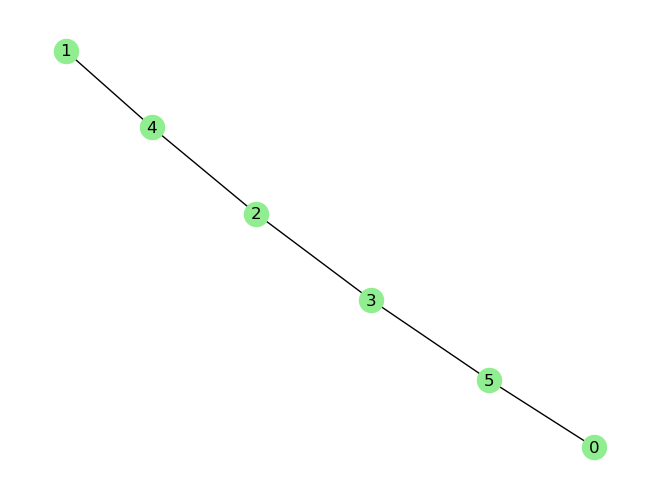

In [2]:
Gs, Gp, Gn, G = dg.create_graph("Friends.csv")
dg.draw_strict_graph(Gs)

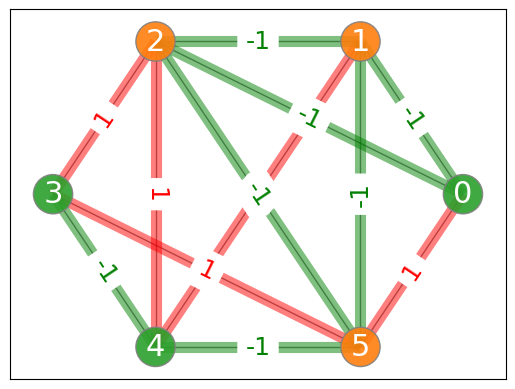

In [3]:
dg.draw_graph(G, coloring=np.array([2, 1, 1, 2, 2, 1]))